<a href="https://colab.research.google.com/github/Mateo755/WDPO_Detection_Project/blob/v2023/Leaves_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing Libraries
import numpy as np
import os


# Importing Library for Data Visualization
import matplotlib.pyplot as plt
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow as tf

# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting
%matplotlib inline


**Data division**

In [ ]:
TrainingImagePath='/content/drive/MyDrive/Leaves dataset/train'
ValidationImagePath='/content/drive/MyDrive/Leaves dataset/test'

Combined_path = '/content/drive/MyDrive/leaves_img'

datagen = ImageDataGenerator(rescale=1/255,
                             validation_split=0.2,
                             rotation_range=10,
                             width_shift_range = 0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True)

# Generating the Training Data
training_set = datagen.flow_from_directory(
        Combined_path,
        target_size=(224,224),
        batch_size=8,
        class_mode="categorical",
        subset='training')

# Generating the Testing Data
valid_set = datagen.flow_from_directory(
        Combined_path,
        target_size=(224,224),
        batch_size=8,
        class_mode="categorical",
        subset='validation')

Found 287 images belonging to 5 classes.
Found 69 images belonging to 5 classes.


**Images in batch nr 1 displaying**

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


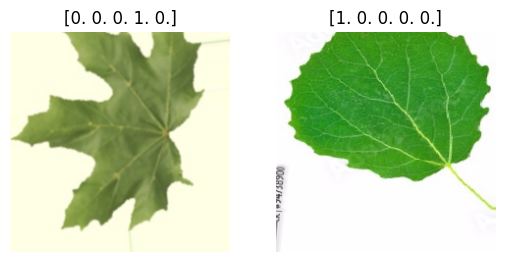

In [ ]:
batch_1_img = training_set[0]
plt.figure(figsize = (20,20))
for i in range(0,2):
    plt.subplot(6,6,i+1)
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')


In [ ]:
# Printing class labels for each face
valid_set.class_indices

{'aspen': 0, 'birch': 1, 'hazel': 2, 'maple': 3, 'oak': 4}

**Creating a list of faces and classes**

In [ ]:
# class_indices have the numeric tag for each balls
TrainClasses = valid_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for idx, leaf in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[idx]=leaf

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  5


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import keras

**Model Building**

In [ ]:
# VGG 16 Model
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
for layer in model_vgg16.layers:
  layer.trainable=False

model_vgg16.summary()

In [ ]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(OutputNeurons, activation='softmax'))

model.summary()

**Model Training**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(training_set, epochs=25, validation_data=valid_set)

Epoch 1/25
36/36 [==============================] - 154s 4s/step - loss: 3.9512 - accuracy: 0.4146 - val_loss: 1.5030 - val_accuracy: 0.4348
Epoch 2/25
36/36 [==============================] - 6s 161ms/step - loss: 0.9301 - accuracy: 0.7038 - val_loss: 0.3238 - val_accuracy: 0.9420
Epoch 3/25
36/36 [==============================] - 7s 199ms/step - loss: 0.3926 - accuracy: 0.8362 - val_loss: 0.2046 - val_accuracy: 0.9855
Epoch 4/25
36/36 [==============================] - 6s 161ms/step - loss: 0.2756 - accuracy: 0.9268 - val_loss: 0.2031 - val_accuracy: 0.9420
Epoch 5/25
36/36 [==============================] - 6s 163ms/step - loss: 0.2562 - accuracy: 0.9024 - val_loss: 0.1775 - val_accuracy: 0.9565
Epoch 6/25
36/36 [==============================] - 8s 233ms/step - loss: 0.2319 - accuracy: 0.9164 - val_loss: 0.1279 - val_accuracy: 0.9565
Epoch 7/25
36/36 [==============================] - 6s 162ms/step - loss: 0.2601 - accuracy: 0.8955 - val_loss: 0.2099 - val_accuracy: 0.8841
Epoch 8

**Model accuracy**

In [ ]:
loss, accuracy = model.evaluate(valid_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

9/9 [==============================] - 2s 158ms/step - loss: 0.0762 - accuracy: 0.9855
Loss: 0.07621883600950241
Accuracy: 0.9855072498321533


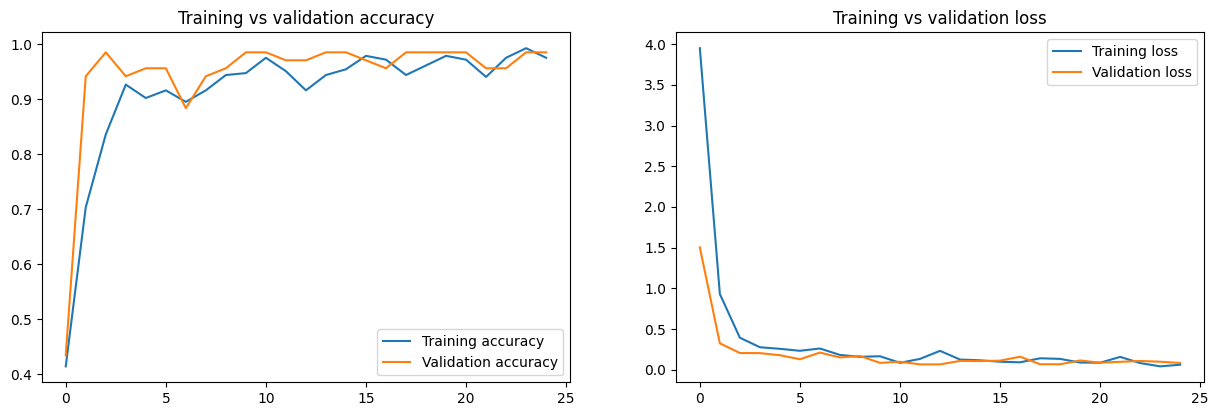

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [ ]:
## Saving the model
model.save(os.path.join('/content/drive/MyDrive','leaves_classifier_model.h5'))

**Model testing phase**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
classifier = tf.keras.models.load_model('/content/drive/MyDrive/Leaves dataset/leaves_classifier.h5')

In [ ]:
import cv2

img = cv2.imread('/content/21.jpg')
img = cv2.resize(img, (224,224))
img = np.reshape(img, [1,224,224,3])
img = img/255

result = classifier.predict(img)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])


1/1 [==============================] - 0s 20ms/step
########################################
Prediction is:  birch
